In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/lynxdataset/LYNXdata.csv
/kaggle/input/nottingham-temp/nottem.csv


In [2]:
nottem = pd.read_csv("../input/nottingham-temp/nottem.csv",header=0,index_col=0,names=['index','temp'])

In [3]:
lynx = pd.read_csv("../input/lynxdataset/LYNXdata.csv",header=0,index_col=0)

In [4]:
lynxseries=pd.Series(lynx['trappings'].values,index=pd.DatetimeIndex(data=(tuple(pd.date_range('31/12/1821',
                                                                                               periods=114,
                                                                                               freq='A-DEC'))),
                                                                    freq='A-DEC'))

In [5]:
lynxseries.head()

1821-12-31     269
1822-12-31     321
1823-12-31     585
1824-12-31     871
1825-12-31    1475
Freq: A-DEC, dtype: int64

In [6]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [7]:
def statistics_testing(timeseries):
    from statsmodels.tsa.stattools import adfuller
    print('Test Results')
    test=adfuller(timeseries,autolag='AIC')
    test_res=pd.Series(test[0:4],index=['Test Statistic','p-value','Number of Lags','Number of Observations Used'])
    print(test_res)

In [8]:
statistics_testing(lynxseries)

Test Results
Test Statistic                  -2.996304
p-value                          0.035241
Number of Lags                   7.000000
Number of Observations Used    106.000000
dtype: float64


Text(0.5, 1.0, 'PACF plot for lynx')

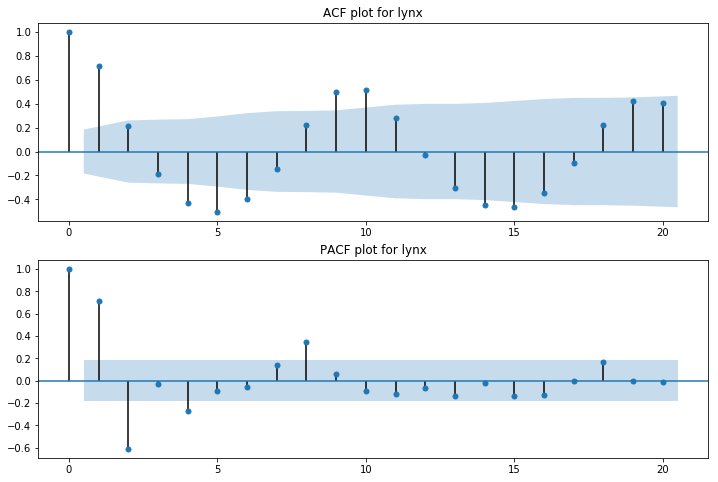

In [9]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,8))
plot_acf(lynxseries,lags=20,ax=ax1)
plot_pacf(lynxseries,lags=20,ax=ax2)
ax1.set_title('ACF plot for lynx')
ax2.set_title('PACF plot for lynx')

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


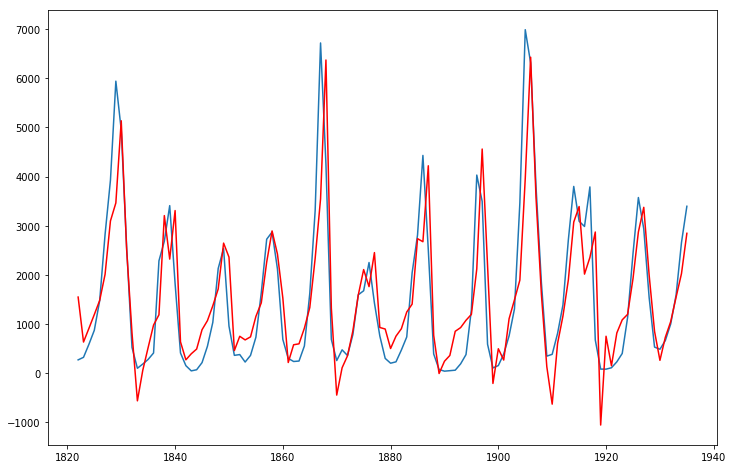

In [10]:
model=ARIMA(lynxseries,order=(4,0,0))
result_AR4=model.fit()
plt.figure(figsize=(12,8))
plt.plot(lynxseries)
plt.plot(result_AR4.fittedvalues,color='red')

In [11]:
lynxseries.tail()

1930-12-31     662
1931-12-31    1000
1932-12-31    1590
1933-12-31    2657
1934-12-31    3396
Freq: A-DEC, dtype: int64

In [12]:
result_AR4.fittedvalues.tail()

1930-12-31     727.549860
1931-12-31    1048.235362
1932-12-31    1546.149602
1933-12-31    2025.003353
1934-12-31    2845.714090
Freq: A-DEC, dtype: float64

In [13]:
result_AR4.resid.tail()

1930-12-31    -65.549860
1931-12-31    -48.235362
1932-12-31     43.850398
1933-12-31    631.996647
1934-12-31    550.285910
Freq: A-DEC, dtype: float64

In [14]:
np.mean(result_AR4.resid)

-9.043198967641954

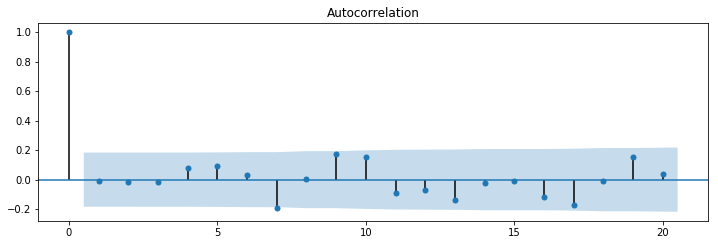

In [15]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(result_AR4.resid, lags=20, ax=ax1)

In [16]:
def resid_histogram(data):
    from scipy.stats import norm
    
    plt.figure(figsize=(10,6))
    plt.hist(data,bins='auto',density=True,rwidth=0.85,label='Residuals')
    mean_resid,std_resid=norm.fit(data)
    xmin,xmax=plt.xlim()
    curve_length=np.linspace(xmin,xmax,100)
    bell_curve=norm.pdf(curve_length,mean_resid,std_resid)
    plt.plot(curve_length,bell_curve,'m',linewidth=2)
    plt.grid(axis='y',alpha=0.2)
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.title('Residual vs Normal distribution - Mean={0} Std={1}'.format(round(mean_resid,2),round(std_resid,2)))
    plt.show()

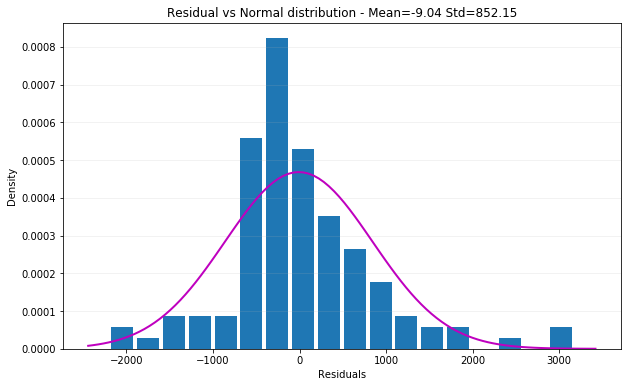

In [17]:
resid_histogram(result_AR4.resid)

In [18]:
result_AR4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  114
Model:                     ARMA(4, 0)   Log Likelihood                -931.111
Method:                       css-mle   S.D. of innovations            845.949
Date:                Sat, 28 Dec 2019   AIC                           1874.222
Time:                        06:30:56   BIC                           1890.639
Sample:                    12-31-1821   HQIC                          1880.885
                         - 12-31-1934                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1547.3979    136.851     11.307      0.000    1279.175    1815.621
ar.L1.y        1.1246      0.090     12.450      0.000       0.948       1.302
ar.L2.y       -0.7174      0.137     -5.250      0.000      -0.985      -0.450
ar.L3.y        0.2634      0.136      1.935      0.056      -0.003       0.530
ar.L4.y       -0.2543      0.090     -2.837      0.005      -0.430      -0.079
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9198           -0.6880j            1.1486           -0.1022
AR.2            0.9198           +0.6880j            1.1486            0.1022
AR.3           -0.4020           -1.6789j            1.7264           -0.2874
AR.4           -0.4020           +1.6789j            1.7264            0.2874
-----------------------------------------------------------------------------
"""

In [19]:
fcast400=result_AR4.predict(start='31/12/1935',end='31/12/1945')

In [20]:
model202=ARIMA(lynxseries,order=(2,0,2))
result_AR202=model202.fit()
fcast202=result_AR202.predict(start='31/12/1935',end='31/12/1945')

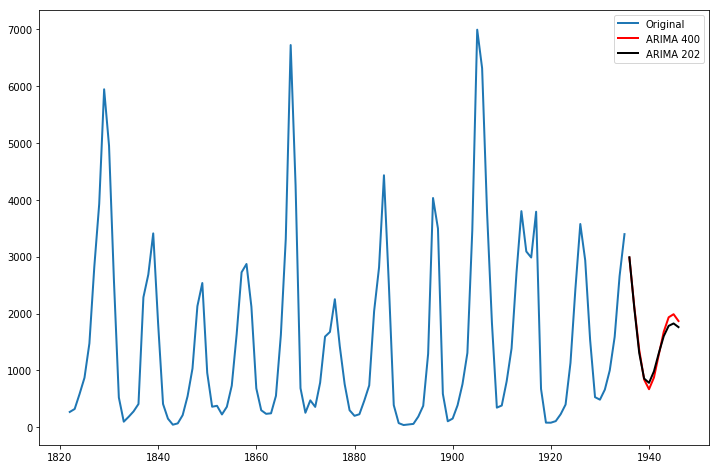

In [21]:
plt.figure(figsize=(12,8))
plt.plot(lynxseries,linewidth=2,label='Original')
plt.plot(fcast400,color='red',linewidth=2,label='ARIMA 400')
plt.plot(fcast202,color='black',linewidth=2,label='ARIMA 202')
plt.legend()

**SARIMA MODEL**

In [22]:
nottem_df=pd.DataFrame((nottem.temp).values,columns=['temperature'],index=pd.date_range('1920-01-31',periods=240,freq='M'))
nottemseries=pd.Series((nottem.temp).values,index=pd.date_range('1920-01-31',periods=240,freq='M'))

In [23]:
nottem_df.head()

,temperature
1920-01-31,40.6
1920-02-29,40.8
1920-03-31,44.4
1920-04-30,46.7
1920-05-31,54.1


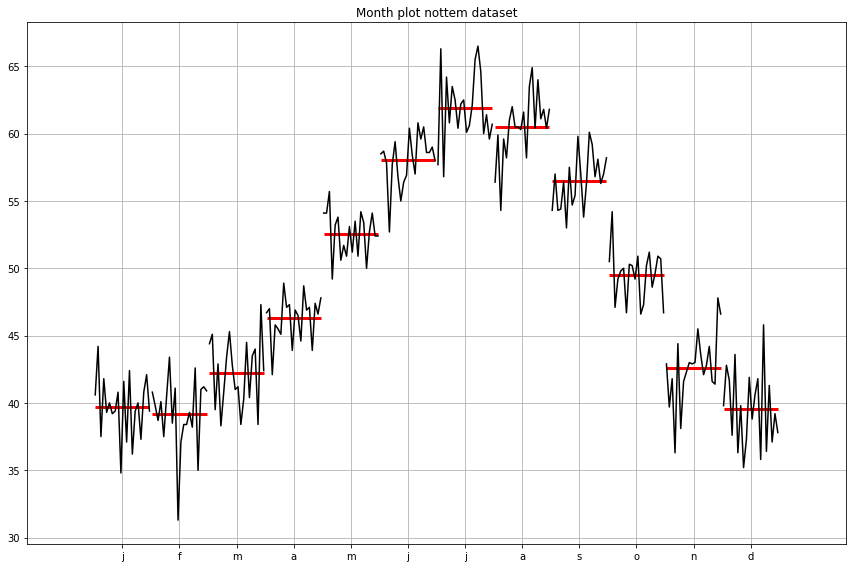

In [24]:
from statsmodels.graphics.tsaplots import month_plot
fig,ax1=plt.subplots(1,1,figsize=(12,8))
month_plot(nottemseries,ax=ax1)
plt.title('Month plot nottem dataset')
plt.grid(axis='both')
plt.tight_layout()

In [25]:
pivot_df=pd.pivot_table(nottem_df,index=nottem_df.index.month,columns=nottem_df.index.year,values='temperature')
pivot_df

,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939
1,40.6,44.2,37.5,41.8,39.3,40.0,39.2,39.4,40.8,34.8,41.6,37.1,42.4,36.2,39.4,40.0,37.3,40.8,42.1,39.4
2,40.8,39.8,38.7,40.1,37.5,40.5,43.4,38.5,41.1,31.3,37.1,38.4,38.4,39.3,38.2,42.6,35.0,41.0,41.2,40.9
3,44.4,45.1,39.5,42.9,38.3,40.8,43.4,45.3,42.8,41.0,41.2,38.4,40.3,44.5,40.4,43.5,44.0,38.4,47.3,42.4
4,46.7,47.0,42.1,45.8,45.5,45.1,48.9,47.1,47.3,43.9,46.9,46.5,44.6,48.7,46.9,47.1,43.9,47.4,46.6,47.8
5,54.1,54.1,55.7,49.2,53.2,53.8,50.6,51.7,50.9,53.1,51.2,53.5,50.9,54.2,53.4,50.0,52.7,54.1,52.4,52.4
6,58.5,58.7,57.8,52.7,57.7,59.4,56.8,55.0,56.4,56.9,60.4,58.4,57.0,60.8,59.6,60.5,58.6,58.6,59.0,58.0
7,57.7,66.3,56.8,64.2,60.8,63.5,62.5,60.4,62.2,62.5,60.1,60.6,62.1,65.5,66.5,64.6,60.0,61.4,59.6,60.7
8,56.4,59.9,54.3,59.6,58.2,61.0,62.0,60.5,60.5,60.3,61.6,58.2,63.5,64.9,60.4,64.0,61.1,61.8,60.4,61.8
9,54.3,57.0,54.3,54.4,56.4,53.0,57.5,54.7,55.4,59.8,57.0,53.8,56.3,60.1,59.2,56.8,58.1,56.3,57.0,58.2
10,50.5,54.2,47.1,49.2,49.8,50.0,46.7,50.3,50.2,49.2,50.9,46.6,47.3,50.2,51.2,48.6,49.6,50.9,50.7,46.7


In [26]:
month_names=('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
pivot_df.index=month_names
pivot_df

,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939
Jan,40.6,44.2,37.5,41.8,39.3,40.0,39.2,39.4,40.8,34.8,41.6,37.1,42.4,36.2,39.4,40.0,37.3,40.8,42.1,39.4
Feb,40.8,39.8,38.7,40.1,37.5,40.5,43.4,38.5,41.1,31.3,37.1,38.4,38.4,39.3,38.2,42.6,35.0,41.0,41.2,40.9
Mar,44.4,45.1,39.5,42.9,38.3,40.8,43.4,45.3,42.8,41.0,41.2,38.4,40.3,44.5,40.4,43.5,44.0,38.4,47.3,42.4
Apr,46.7,47.0,42.1,45.8,45.5,45.1,48.9,47.1,47.3,43.9,46.9,46.5,44.6,48.7,46.9,47.1,43.9,47.4,46.6,47.8
May,54.1,54.1,55.7,49.2,53.2,53.8,50.6,51.7,50.9,53.1,51.2,53.5,50.9,54.2,53.4,50.0,52.7,54.1,52.4,52.4
Jun,58.5,58.7,57.8,52.7,57.7,59.4,56.8,55.0,56.4,56.9,60.4,58.4,57.0,60.8,59.6,60.5,58.6,58.6,59.0,58.0
Jul,57.7,66.3,56.8,64.2,60.8,63.5,62.5,60.4,62.2,62.5,60.1,60.6,62.1,65.5,66.5,64.6,60.0,61.4,59.6,60.7
Aug,56.4,59.9,54.3,59.6,58.2,61.0,62.0,60.5,60.5,60.3,61.6,58.2,63.5,64.9,60.4,64.0,61.1,61.8,60.4,61.8
Sep,54.3,57.0,54.3,54.4,56.4,53.0,57.5,54.7,55.4,59.8,57.0,53.8,56.3,60.1,59.2,56.8,58.1,56.3,57.0,58.2
Oct,50.5,54.2,47.1,49.2,49.8,50.0,46.7,50.3,50.2,49.2,50.9,46.6,47.3,50.2,51.2,48.6,49.6,50.9,50.7,46.7


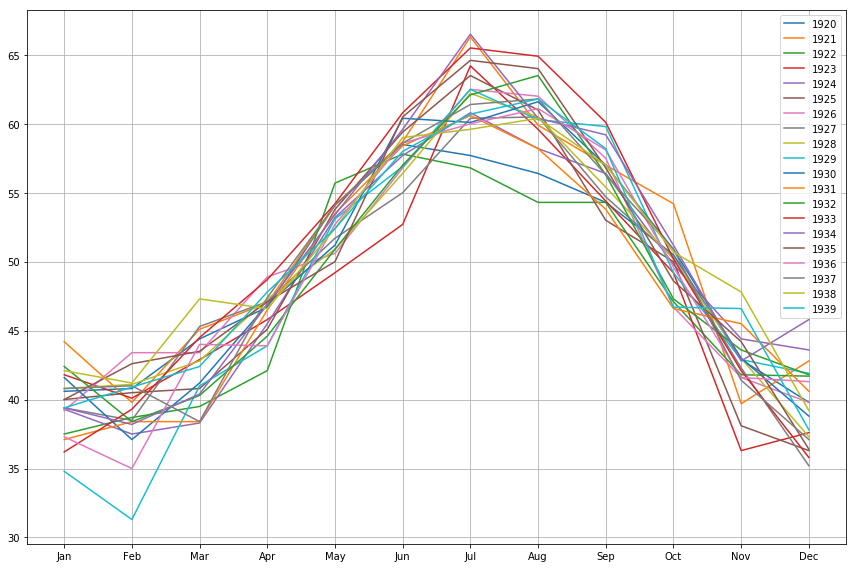

In [27]:
plt.figure(figsize=(12,8))
plt.plot(pivot_df)
plt.grid(axis='both')
plt.legend(pivot_df.columns)
plt.tight_layout()

In [28]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 2.8MB/s 


In [29]:
import pmdarima as pm

In [30]:
sarima=pm.auto_arima(nottemseries,error_action='ignore',suppress_warnings=True,seasonal=True,m=12,star_p=1,start_q=1,start_P=0,start_Q=0,D=1,max_order=5,max_d=1,max_D=1,stepwise=False,trace=True)

Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=1213.182, BIC=1220.041, Fit time=0.063 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 1, 12); AIC=1065.791, BIC=1076.079, Fit time=0.657 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 2, 12); AIC=1061.945, BIC=1075.663, Fit time=1.781 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=1096.427, BIC=1106.715, Fit time=0.597 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 1, 1, 12); AIC=1060.230, BIC=1073.948, Fit time=0.775 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 1, 2, 12); AIC=1060.668, BIC=1077.815, Fit time=2.733 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(2, 1, 0, 12); AIC=1080.055, BIC=1093.772, Fit time=1.368 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(2, 1, 1, 12); AIC=1059.767, BIC=1076.914, Fit time=2.632 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(2, 1, 2, 12); AIC=1061.767, BIC=1082.343, Fit time=4.497 seconds
Fit ARIMA: order=(0, 0, 1) s

In [31]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  240
Model:             SARIMAX(1, 0, 0)x(2, 1, 1, 12)   Log Likelihood                -516.879
Date:                            Sat, 28 Dec 2019   AIC                           1045.757
Time:                                    06:34:34   BIC                           1066.333
Sample:                                         0   HQIC                          1054.059
                                            - 240                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0353      0.036      0.976      0.329      -0.036       0.106
ar.L1          0.2650      0.061      4.317      0.000       0.145       0.385
ar.S.L12      -0.1818      0.108     -1.677      0.094      -0.394       0.031
ar.S.L24       0.1466      0.104      1.408      0.159      -0.058       0.351
ma.S.L12      -0.8324      0.098     -8.505      0.000      -1.024      -0.641
sigma2         5.0728      0.513      9.886      0.000       4.067       6.079
===================================================================================
Ljung-Box (Q):                       42.53   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.36   Prob(JB):                         0.83
Heteroskedasticity (H):               0.88   Skew:                            -0.08
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

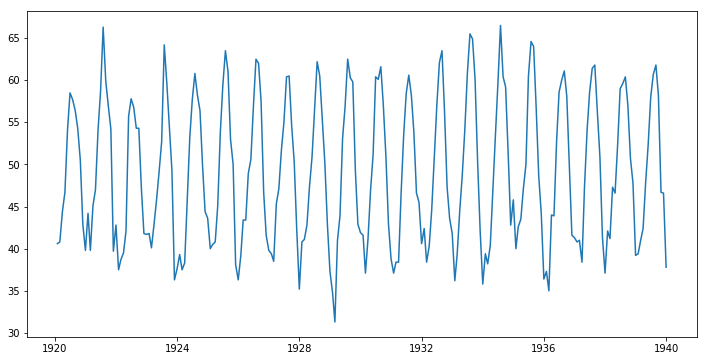

In [32]:
fig=plt.figure(figsize=(12,6))
plt.plot(nottemseries)

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
nottem_decompose=seasonal_decompose(nottemseries)

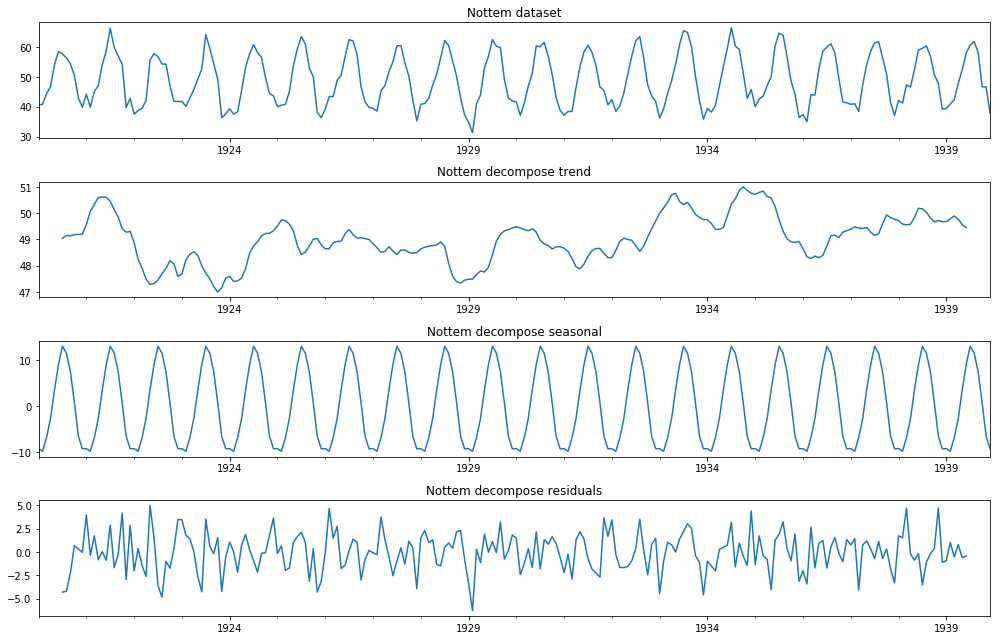

In [34]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(14,9))
nottemseries.plot(ax=ax1)
nottem_decompose.trend.plot(ax=ax2)
nottem_decompose.seasonal.plot(ax=ax3)
nottem_decompose.resid.plot(ax=ax4)
ax1.set_title('Nottem dataset')
ax2.set_title('Nottem decompose trend')
ax3.set_title('Nottem decompose seasonal')
ax4.set_title('Nottem decompose residuals')
plt.tight_layout()

In [35]:
!pip install stldecompose

In [36]:
from stldecompose import decompose
nottem_stl=decompose(nottemseries,period=12)

In [37]:
nottem_stl.trend.head()

1920-01-31    48.616042
1920-02-29    48.612980
1920-03-31    48.609917
1920-04-30    48.606960
1920-05-31    48.604002
Freq: M, dtype: float64

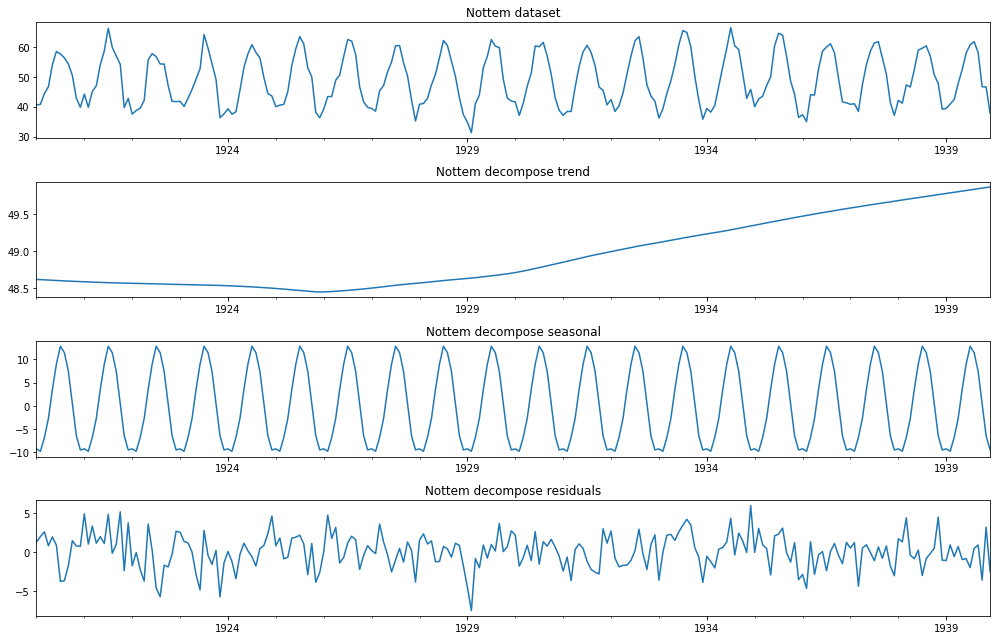

In [38]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(14,9))
nottemseries.plot(ax=ax1)
nottem_stl.trend.plot(ax=ax2)
nottem_stl.seasonal.plot(ax=ax3)
nottem_stl.resid.plot(ax=ax4)
ax1.set_title('Nottem dataset')
ax2.set_title('Nottem decompose trend')
ax3.set_title('Nottem decompose seasonal')
ax4.set_title('Nottem decompose residuals')
plt.tight_layout()

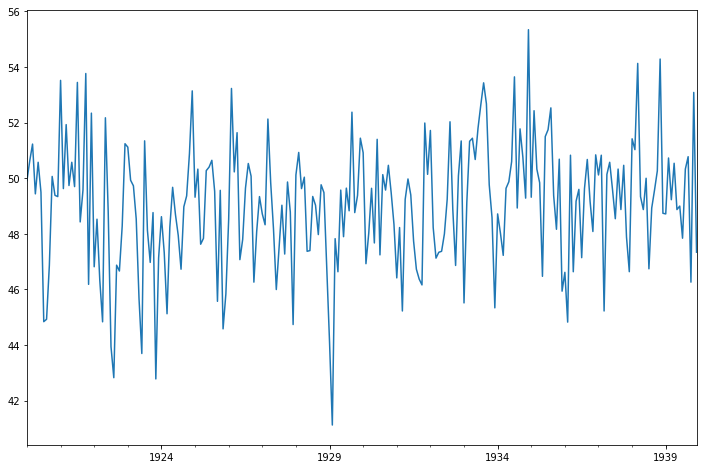

In [39]:
nottem_adjusted=nottemseries-nottem_stl.seasonal
plt.figure(figsize=(12,8))
nottem_adjusted.plot()

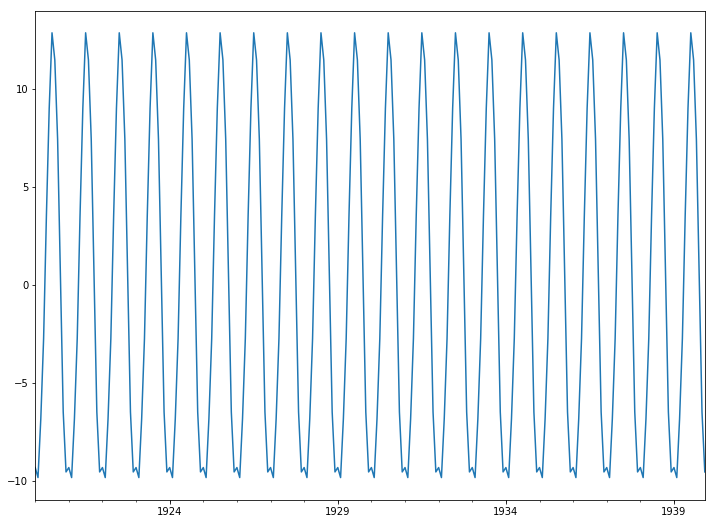

In [40]:
plt.figure(figsize=(12,9))
nottem_stl.seasonal.plot()

In [41]:
from stldecompose import forecast
from stldecompose.forecast_funcs import (naive,drift,mean,seasonal_naive)

In [42]:
stl_fc=forecast(nottem_stl,steps=12,fc_func=seasonal_naive,seasonal=True)
stl_fc.head()

,seasonal_naive+seasonal
1940-01-31,40.508501
1940-03-02,40.006367
1940-04-02,43.014288
1940-05-03,47.111975
1940-06-03,53.384711


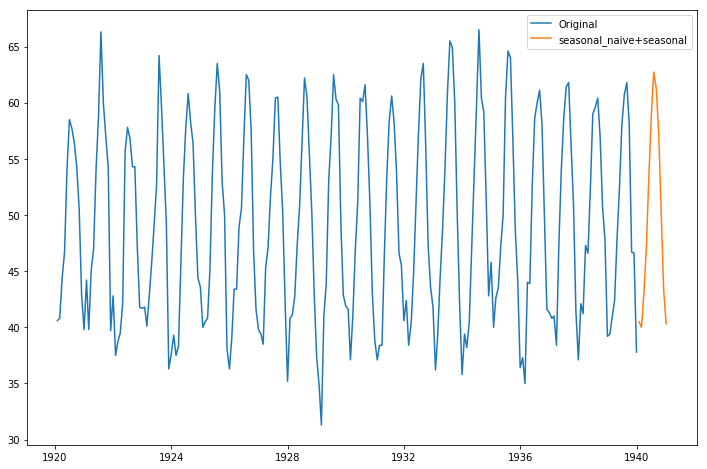

In [43]:
plt.figure(figsize=(12,8))
plt.plot(nottemseries,label='Original')
plt.plot(stl_fc,label=stl_fc.columns[0])
plt.legend()